In [ ]:
# dataset taken from https://www.kaggle.com/datasets/svaningelgem/crypto-currencies-daily-prices

In [ ]:
# importing libraries
import pandas as pd
import polars as pl
import numpy as np
import time
import os
import matplotlib.pyplot as plt

In [4]:
# loading data into pandas, polars and pandas with pyarrow engine

DIR_PATH = r"C:\Users\edvar\Documents\jupyter\pandas_polars\crypto_kaggle\\"
files = os.listdir(DIR_PATH)

crypto_df_polars = pl.DataFrame()

for file in files:
    crypto_df_polars_temp = pl.read_csv(os.path.join(DIR_PATH, file)) # default engine is NumPy
    crypto_df_polars = pl.concat([crypto_df_polars, crypto_df_polars_temp], how='vertical')


df = crypto_df_polars.with_columns(
    pl.col('date').str.strptime(pl.Datetime, "%Y-%m-%d")
)

In [5]:
df.head()

ticker,date,open,high,low,close
str,datetime[μs],f64,f64,f64,f64
"""1INCH""",2021-01-08 00:00:00,1.3,1.357,1.143,1.2
"""1INCH""",2021-01-09 00:00:00,1.2,1.34,1.114,1.244
"""1INCH""",2021-01-10 00:00:00,1.244,1.547,1.1,1.224
"""1INCH""",2021-01-11 00:00:00,1.224,1.224,0.9543,1.127
"""1INCH""",2021-01-12 00:00:00,1.127,1.21,1.049,1.117


In [7]:
df.describe

<bound method DataFrame.describe of shape: (226_180, 6)
┌────────┬─────────────────────┬─────────┬─────────┬─────────┬─────────┐
│ ticker ┆ date                ┆ open    ┆ high    ┆ low     ┆ close   │
│ ---    ┆ ---                 ┆ ---     ┆ ---     ┆ ---     ┆ ---     │
│ str    ┆ datetime[μs]        ┆ f64     ┆ f64     ┆ f64     ┆ f64     │
╞════════╪═════════════════════╪═════════╪═════════╪═════════╪═════════╡
│ 1INCH  ┆ 2021-01-08 00:00:00 ┆ 1.3     ┆ 1.357   ┆ 1.143   ┆ 1.2     │
│ 1INCH  ┆ 2021-01-09 00:00:00 ┆ 1.2     ┆ 1.34    ┆ 1.114   ┆ 1.244   │
│ 1INCH  ┆ 2021-01-10 00:00:00 ┆ 1.244   ┆ 1.547   ┆ 1.1     ┆ 1.224   │
│ 1INCH  ┆ 2021-01-11 00:00:00 ┆ 1.224   ┆ 1.224   ┆ 0.9543  ┆ 1.127   │
│ 1INCH  ┆ 2021-01-12 00:00:00 ┆ 1.127   ┆ 1.21    ┆ 1.049   ┆ 1.117   │
│ …      ┆ …                   ┆ …       ┆ …       ┆ …       ┆ …       │
│ ZEN    ┆ 2026-02-09 00:00:00 ┆ 6.03259 ┆ 6.14454 ┆ 5.70686 ┆ 5.98701 │
│ ZEN    ┆ 2026-02-10 00:00:00 ┆ 5.995   ┆ 6.03698 ┆ 5.77753 ┆ 5.865

In [8]:
df.schema

Schema([('ticker', String),
        ('date', Datetime(time_unit='us', time_zone=None)),
        ('open', Float64),
        ('high', Float64),
        ('low', Float64),
        ('close', Float64)])

In [9]:
df.head()

ticker,date,open,high,low,close
str,datetime[μs],f64,f64,f64,f64
"""1INCH""",2021-01-08 00:00:00,1.3,1.357,1.143,1.2
"""1INCH""",2021-01-09 00:00:00,1.2,1.34,1.114,1.244
"""1INCH""",2021-01-10 00:00:00,1.244,1.547,1.1,1.224
"""1INCH""",2021-01-11 00:00:00,1.224,1.224,0.9543,1.127
"""1INCH""",2021-01-12 00:00:00,1.127,1.21,1.049,1.117


In [ ]:
df = df.with_columns([
        pl.col('close').pct_change().over('ticker').alias('daily_return')
        ]).with_columns([
            pl.col('daily_return').rolling_std(30).over('ticker').alias('volatility_30d')
])

In [32]:
df['ticker'].value_counts().sort('count', descending=True).head(10)

ticker,count
str,u32
"""BTC""",5642
"""LTC""",4445
"""DASH""",4271
"""XRP""",3990
"""XMR""",3985
"""ETH""",3795
"""DCR""",3766
"""DOGE""",3466
"""ETC""",3440


### Moving Averages for LTC

In [33]:
ltc_data = df.filter(pl.col('ticker') == 'LTC')

In [45]:
ltc_data = ltc_data.with_columns([pl.col('close').rolling_mean(30).alias('close_30d_ma'),
                                  pl.col('close').rolling_mean(50).alias('close_50d_ma')])

In [46]:
ltc_data.head()

ticker,date,open,high,low,close,daily_return,volatility_30d,daily_pct_return,close_30d_ma,close_50d_ma
str,datetime[μs],f64,f64,f64,f64,f64,f64,f64,f64,f64
"""LTC""",2013-10-24 00:00:00,3.0,-3.0,3.0,3.0,null,null,null,null,null
"""LTC""",2013-10-25 00:00:00,3.0,-3.0,3.0,3.0,0.0,null,0.0,null,null
"""LTC""",2013-10-26 00:00:00,3.0,-3.0,3.0,3.0,0.0,null,0.0,null,null
"""LTC""",2013-10-27 00:00:00,3.0,-3.0,3.0,3.0,0.0,null,0.0,null,null
"""LTC""",2013-10-28 00:00:00,3.0,-3.0,3.0,3.0,0.0,null,0.0,null,null


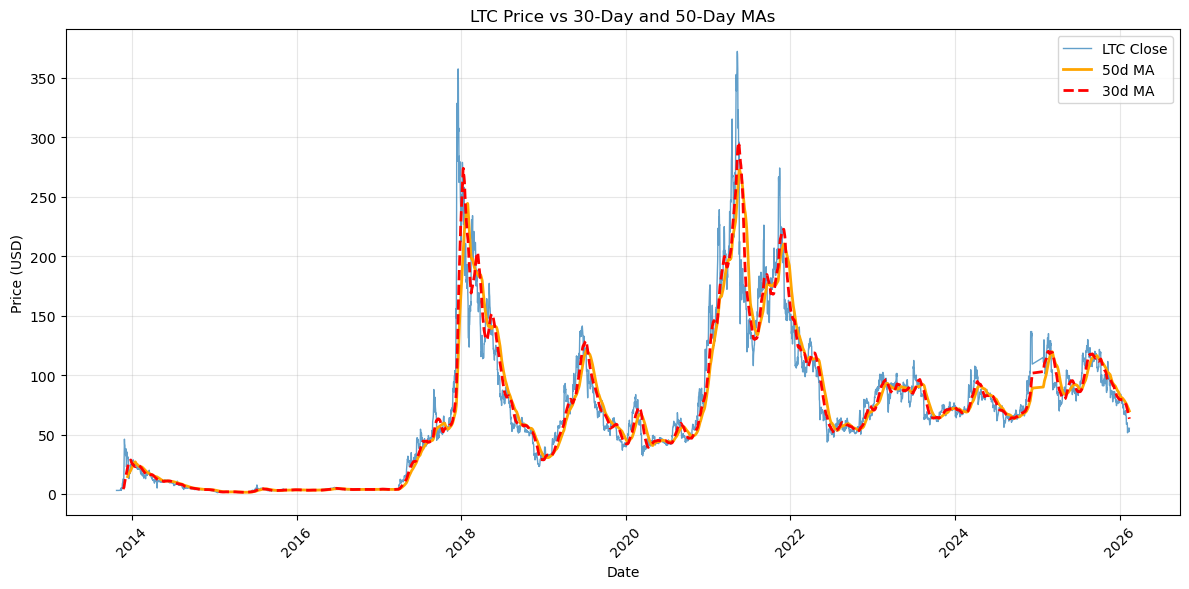

In [49]:
ltc_pandas = ltc_data.select(['date', 'close', 'close_30d_ma', 'close_50d_ma']).to_pandas()

# Plot
plt.figure(figsize=(12, 6))
plt.plot(ltc_pandas['date'], ltc_pandas['close'], label='LTC Close', alpha=0.7, linewidth=1)
plt.plot(ltc_pandas['date'], ltc_pandas['close_50d_ma'], label='50d MA', linewidth=2, color='orange')
plt.plot(ltc_pandas['date'], ltc_pandas['close_30d_ma'],
         label='30d MA', linewidth=2, color='red', linestyle='--')
plt.title('LTC Price vs 30-Day and 50-Day MAs')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Top 'performers'

In [ ]:
monthly_returns = (
    df.group_by('ticker', pl.col('date').dt.truncate('1mo'))
                   .agg([
                       (pl.col('close').last() / pl.col('close').first() - 1).alias('monthly_return')
                   ]).sort(['ticker', 'date']))

In [63]:
besties = df.group_by('ticker').agg([
    pl.col('close').last() / pl.col('close').first() - 1]).sort('close', descending=True).head(5)

In [67]:
besties.rename({'close': 'total_return'}).head()

ticker,total_return
str,f64
"""BTC""",1.3933e6
"""XMR""",1124.362407
"""ETH""",683.596333
"""BNB""",612.837624
"""DOGE""",328.968027


### Sharpe ratio

In [68]:
risk_return = (df
               .group_by('ticker')
               .agg([
                   pl.col('daily_return').std().alias('volatility'),
                   pl.col('daily_return').mean().alias('avg_daily_return'),
                   pl.col('daily_return').count().alias('days_traded')
               ])
               .with_columns([
                   # Annualized Sharpe = (mean return * 365) / volatility
                   (pl.col('avg_daily_return') * 365 /
                    pl.col('volatility')).alias('sharpe_ratio'),
                   # Annualized volatility
                   (pl.col('volatility') * np.sqrt(365)).alias('ann_volatility')
               ])
               # Filter: min 100 days, positive Sharpe only
               .filter((pl.col('days_traded') >= 100) & (pl.col('sharpe_ratio') > 0))
               .sort('sharpe_ratio', descending=True)
               )

In [70]:
print("Top 10 Sharpe tickers:")
print(risk_return.head(10).select(
    ['ticker', 'sharpe_ratio', 'ann_volatility', 'days_traded']))

Top 10 Sharpe tickers:
shape: (10, 4)
┌────────┬──────────────┬────────────────┬─────────────┐
│ ticker ┆ sharpe_ratio ┆ ann_volatility ┆ days_traded │
│ ---    ┆ ---          ┆ ---            ┆ ---         │
│ str    ┆ f64          ┆ f64            ┆ u32         │
╞════════╪══════════════╪════════════════╪═════════════╡
│ PAXG   ┆ 26.394144    ┆ 0.18295        ┆ 1387        │
│ XAUt   ┆ 26.015035    ┆ 0.226915       ┆ 1320        │
│ SOL    ┆ 23.84106     ┆ 1.228582       ┆ 2086        │
│ BNB    ┆ 23.641242    ┆ 1.035907       ┆ 3031        │
│ XDC    ┆ 22.482527    ┆ 1.187988       ┆ 1933        │
│ BTC    ┆ 21.99752     ┆ 1.323286       ┆ 5641        │
│ XMR    ┆ 21.579065    ┆ 2.236118       ┆ 3984        │
│ ETH    ┆ 21.513432    ┆ 1.061848       ┆ 3794        │
│ POL    ┆ 20.594994    ┆ 1.367412       ┆ 2320        │
│ TRAC   ┆ 19.764283    ┆ 3.737286       ┆ 1322        │
└────────┴──────────────┴────────────────┴─────────────┘


In [79]:
plot_data = risk_return.head(8).to_pandas()  # Top 10 by Sharpe

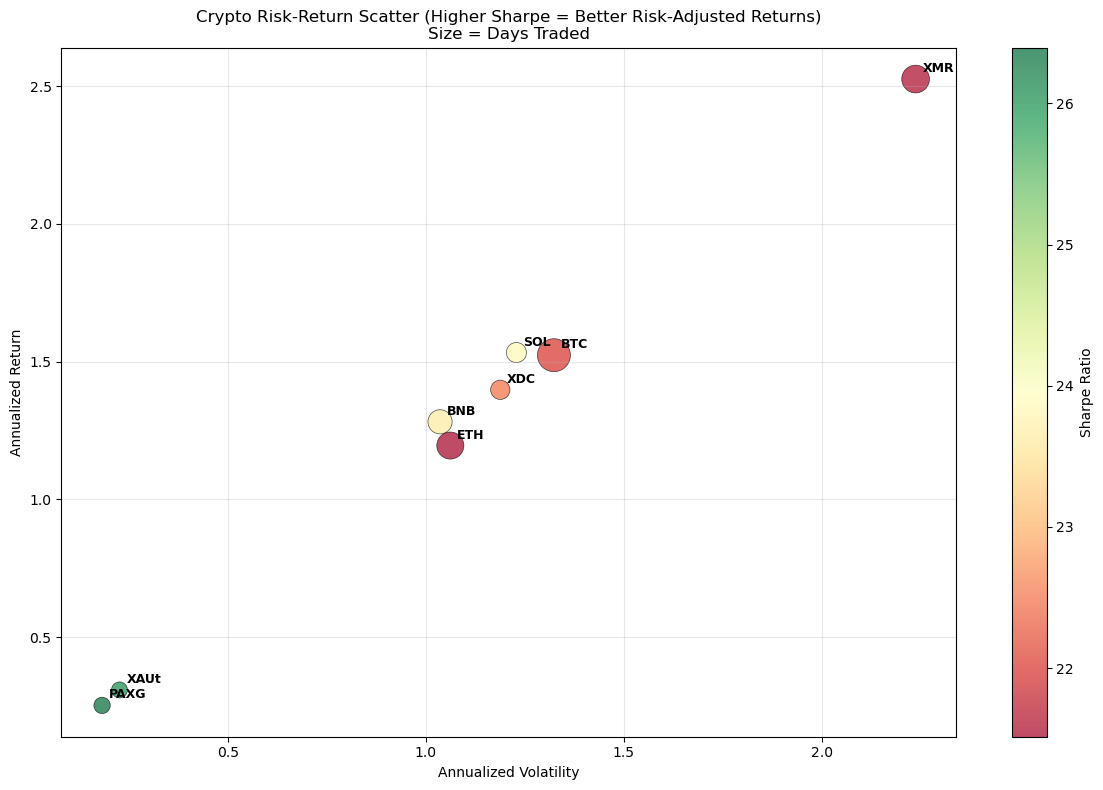

In [80]:
plt.figure(figsize=(12, 8))

# Scatter: volatility (X) vs avg return (Y)
# Sharpe = color
# size = days traded
scatter = plt.scatter(plot_data['ann_volatility'],
                      plot_data['avg_daily_return'] * 365,  # Annualized return
                      c=plot_data['sharpe_ratio'],
                      s=plot_data['days_traded']/10,  # Bubble size
                      cmap='RdYlGn', alpha=0.7, edgecolors='black', linewidth=0.5)

# Top 5 labels
topies = plot_data.head(8)
for i, row in topies.iterrows():
    plt.annotate(row['ticker'], (row['ann_volatility'], row['avg_daily_return']*365),
                 xytext=(5, 5), textcoords='offset points', fontsize=9, fontweight='bold')

plt.colorbar(scatter, label='Sharpe Ratio')
plt.xlabel('Annualized Volatility')
plt.ylabel('Annualized Return')
plt.title('Crypto Risk-Return Scatter (Higher Sharpe = Better Risk-Adjusted Returns)\nSize = Days Traded')
plt.grid(True, alpha=0.3)

# Efficient frontier line (max Sharpe for each vol level)
plt.tight_layout()
plt.show()